WEN Pymaceuticals, Inc.

Homework 05 Matplotlib Python Pandas: Pymaceuticals, Inc.
Script name: WEN_HM_PymaceuticalsInc.ipynb
WASHSTL201809DATA3

Data located in the following Directory:
    ResourceData

Figures located in the following Directory:
    FinalFigures
    
Analysis:

* Of the four drugs presented in the below report, Capomulin, did the     best as far as reduced tumor growth, the least metastatic spread, the best survival rate of the 45 day study as compared to palcebo.

* Ketapril, had the least reducing ablility in this study as compared to palcebo.

* Infubinol, behaved very similiarly to palcebo.  However, it had a lowerest survivial rate in this study of the four drugs.




In [243]:
#Homework 05 Matplotlib Python Pandas: Pymaceuticals, Inc.
#Script name: WEN_HM_PymaceuticalsInc.ipynb
#WEN_WASHSTL201809DATA3

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "ResourceData/mouse_drug_data.csv"
clinical_trial_data_to_load = "ResourceData/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseDrugData_df = pd.read_csv(mouse_drug_data_to_load)
clinicalTrialData_df = pd.read_csv(clinical_trial_data_to_load)
#list(mouseDrugData_df)
#list(clinicalTrialData_df)
countMouse = len(mouseDrugData_df)
countClinical = len(clinicalTrialData_df)
#print(f"{countMouse + countClinical}") # 2143
#print(f"{countMouse};{countClinical}") #250;1893
# Combine the data into a single dataset

combinedMDCTData_df = pd.merge(clinicalTrialData_df,mouseDrugData_df, how='left', on='Mouse ID')
countCombined = len(combinedMDCTData_df)

### did value counts on mouse ID in both files... looked for duplicate names... Mouse g989 is a misnamed mouse...
### going to eliminate g989 since it must be a mislabeled or misnamed mouse... given two different drugs
### so just going to work with out it...
#print(f"{countCombined}") # 1906

#mouseDrugData_df['Mouse ID'].value_counts()     ## shows g989    2  
#clinicalTrialData_df['Mouse ID'].value_counts() ## also shows g989    2
#df[df.name != 'Tina']
combinedMDCTData_df = combinedMDCTData_df[combinedMDCTData_df['Mouse ID'] != 'g989']

##Here are the four drugs of interest: Capomulin, Infubinol, Ketapril, and Placebo

combinedMDCTData_df = combinedMDCTData_df[(combinedMDCTData_df["Drug"] == 'Capomulin') |
                                         (combinedMDCTData_df["Drug"] == 'Infubinol') |
                                         (combinedMDCTData_df["Drug"] == 'Ketapril' ) |
                                         (combinedMDCTData_df["Drug"] == 'Placebo') ]
combinedMDCTData_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [244]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

meanTumorVol = pd.DataFrame(combinedMDCTData_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)'])
meanTumorVol = meanTumorVol.unstack(level = 0)
meanTumorVol.columns = meanTumorVol.columns.get_level_values(1)

meanTumorVol.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [245]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

stderrTumorVol = pd.DataFrame(combinedMDCTData_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
#stderrTumorVol.head()

In [246]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

stderrTumorVol = stderrTumorVol.unstack(level = 0)
stderrTumorVol.columns = stderrTumorVol.columns.get_level_values(1)
stderrTumorVol.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


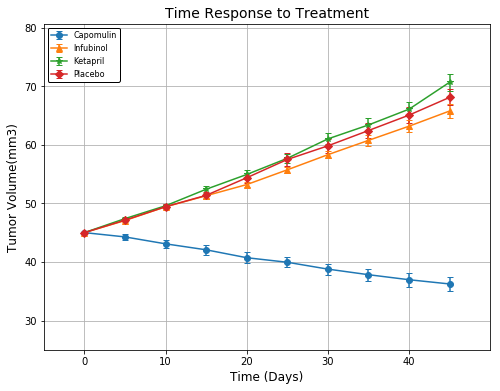

In [247]:
# Generate the Plot (with Error Bars)
# Save the Figure
##https://stackoverflow.com/questions/13555607/adding-error-bars-to-matplotlib-generated-graph-of-pandas-dataframe-creates-inva
##http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html
##https://matplotlib.org/api/pyplot_api.html
##legend options ## https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend
## https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

plt.figure(figsize=(8,6))
plt.title('Time Response to Treatment', fontdict = {'fontsize': 14})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 12})
plt.ylabel('Tumor Volume(mm3)', fontdict = {'fontsize': 12})
plt.xticks(np.arange(0,meanTumorVol.index.max() + 3 ,10))
plt.xlim(-5, meanTumorVol.index.max() + 5)
plt.ylim(25, meanTumorVol.max().max() + 10)

markers = ['o', '^', '*','D','4','+','P','H','s','8'] 

# independent variable / timepoints
x_axis = meanTumorVol.index 

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error

for z in stderrTumorVol.columns:
    plt.errorbar(x_axis, 
                 meanTumorVol[z], 
                 stderrTumorVol[z], 
                 linestyle = 'solid', 
                 marker =  markers[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1
       
plt.grid(linestyle="solid")    

legend = plt.legend(loc = 'upper left',
                numpoints = 1, 
                frameon = True, 
                markerscale = 1, 
                edgecolor = 'black', 
                fontsize = '8', 
                framealpha = 1)

plt.savefig("FinalFigures/TRresponseFig1.png")

plt.show()

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [248]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
meanMetaSite = pd.DataFrame(combinedMDCTData_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites'])

meanMetaSite = meanMetaSite.unstack(level = 0)
meanMetaSite.columns = meanMetaSite.columns.get_level_values(level = 1)
meanMetaSite.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [249]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
stderrMetaSite = pd.DataFrame(combinedMDCTData_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])

stderrMetaSite = stderrMetaSite.unstack(level = 0)
stderrMetaSite.columns = stderrMetaSite.columns.get_level_values(level = 1)
stderrMetaSite.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


In [250]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked


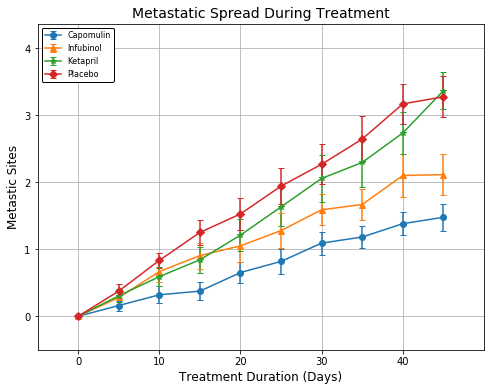

In [251]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

plt.figure(figsize=(8,6))
plt.title('Metastatic Spread During Treatment', fontdict = {'fontsize': 14})
plt.xlabel('Treatment Duration (Days)', fontdict = {'fontsize': 12})
plt.ylabel('Metastic Sites', fontdict = {'fontsize': 12})
plt.xticks(np.arange(0,meanMetaSite.index.max() + 3 ,10))
plt.xlim(-5, meanMetaSite.index.max() + 5)
plt.ylim(-0.5, meanMetaSite.max().max() + 1)

#markers defined
markers = ['o', '^', '*','D','4','+','P','H','s','8'] 

# independent variable/timepoints
x_axis = meanMetaSite.index 

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for z in meanMetaSite:
    plt.errorbar(x_axis, 
                 meanMetaSite[z], 
                 stderrMetaSite[z], 
                 linestyle = 'solid', 
                 marker =  markers[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1
    
plt.grid(linestyle="solid")    

legend = plt.legend(loc = 'upper left',
                numpoints = 1, 
                frameon = True, 
                markerscale = 1, 
                edgecolor = 'black', 
                fontsize = '8', 
                framealpha = 1)

plt.savefig("FinalFigures/MetastaticFig2.png")

plt.show()

## Survival Rates

In [252]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
countMouseID = combinedMDCTData_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
countMouseID = countMouseID.unstack(level = 0)
countMouseID.head()


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


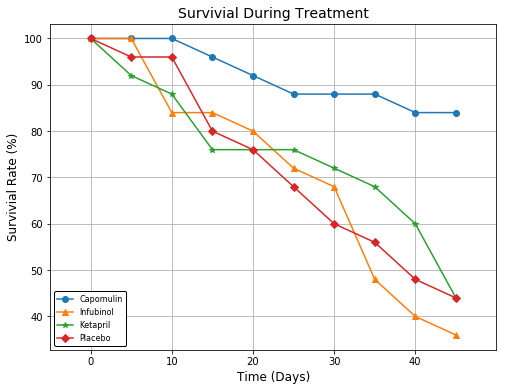

In [253]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

plt.figure(figsize=(8,6))
plt.title('Survivial During Treatment', fontdict = {'fontsize': 14})
plt.xlabel('Time (Days)', fontdict = {'fontsize': 12})
plt.ylabel('Survivial Rate (%)', fontdict = {'fontsize': 12})
plt.xticks(np.arange(0,countMouseID.index.max() + 3 ,10))
plt.xlim(-5, countMouseID.index.max() + 5)

#markers defined
markers = ['o', '^', '*','D','4','+','P','H','s','8'] 

# independent variable/timepoints
x_axis = countMouseID.index 

#count for markers in plot loop
count = 0

#plot each tumor volume column with standard error
for z in countMouseID:
    
    y_axis = countMouseID[z]/countMouseID.loc[0,z] * 100
    plt.plot(x_axis,
             y_axis,
             linestyle = 'solid',
             marker = markers[count],
            )
        
    count += 1
    
plt.grid(linestyle="solid")    

legend = plt.legend(loc = 'lower left',
                numpoints = 1, 
                frameon = True, 
                markerscale = 1, 
                edgecolor = 'black', 
                fontsize = '8', 
                framealpha = 1)

plt.savefig("FinalFigures/SurvivalFig3.png")

plt.show()

In [254]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [255]:
# Calculate the percent changes for each drug
# Display the data to confirm

changePercentVolume = (meanTumorVol.loc[45, :] - meanTumorVol.loc[0, :]) / meanTumorVol.loc[0, :] * 100 

changePercentVolume


Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

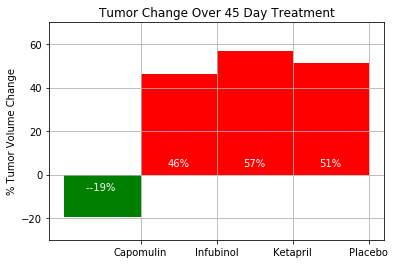

In [256]:
#zbarplot

# Pandas can also plot multiple columns if the DataFrame includes them
#multi_plot = rain_df.plot(kind="bar", figsize=(20,5))
#multi_plot.set_xticklabels(rain_df["State"], rotation=45)
#plt.xticks(rotation=90)

# Store all Relevant Percent Changes into a Tuple
pctChangesTup = (changePercentVolume["Capomulin"], 
                 changePercentVolume["Infubinol"], 
                 changePercentVolume["Ketapril"], 
                 changePercentVolume["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
xlab = np.arange(len(pctChangesTup))  
width = 1
drugsPass = ax.bar(xlab[0], pctChangesTup[0], width, color='green')
drugsFail = ax.bar(xlab[1:], pctChangesTup[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(xlab + 0.5)
#ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_xticklabels(changePercentVolume.index)
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(drugs):
    for drug in drugs:
        height = drug.get_height()
        ax.text(drug.get_x() + drug.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(drugs):
    for drug in drugs:
        height = drug.get_height()
        ax.text(drug.get_x() + drug.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(drugsPass)
autolabelFail(drugsFail)

# Save the Figure
fig.savefig("FinalFigures/SumaryFig4.png")

# Show the Figure
fig.show()



In [257]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure

# Show the Figure
fig.show()


